Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.

In [2]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = data('iris')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.rename(columns={'Sepal.Width': 'sepal_width', 'Petal.Width': 'petal_width',
                   'Sepal.Length': 'sepal_length', 'Petal.Length': 'petal_length',
                   'Species': 'species'}, inplace=True)

In [5]:
seed = 42

train, test_val = train_test_split(df, train_size=0.7,
                                   random_state=seed)

test, val = train_test_split(test_val, train_size=0.5,
                             random_state=seed)

In [6]:
X_train = train[['petal_width', 'sepal_width']]

In [7]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train)

kmeans.predict(X_train)

array([2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0], dtype=int32)

In [8]:
train['cluster'] = kmeans.predict(X_train)

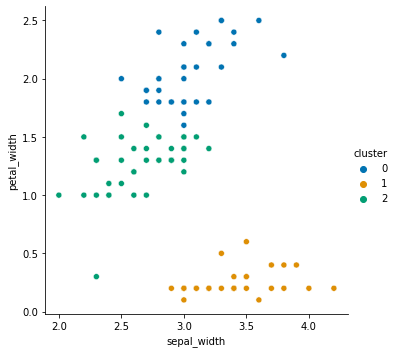

In [9]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster',
            palette='colorblind', data=train)
plt.show()

Visualize the results of your clustering.

Text(0.5, 1.0, 'Clusters generated by KMeans.')

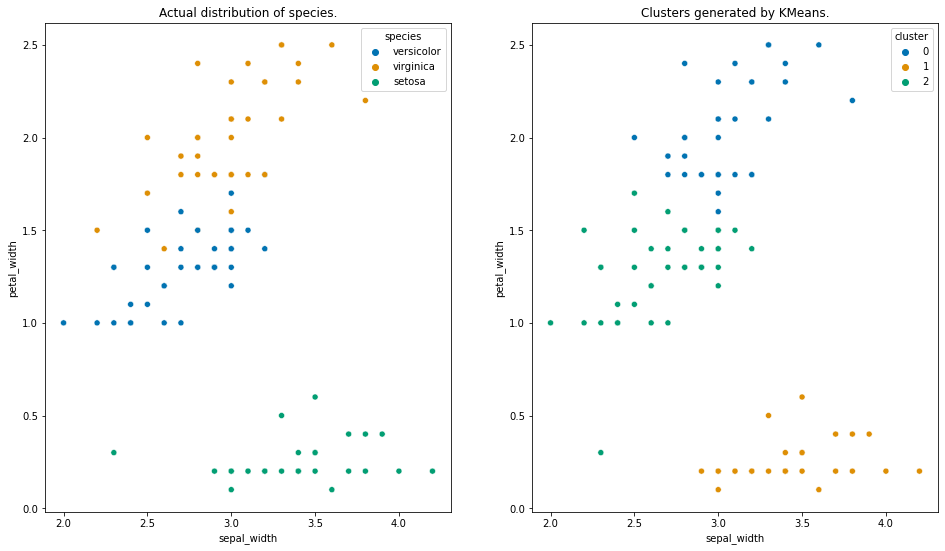

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='sepal_width', y='petal_width', hue='species',
                palette='colorblind', data=train)
axes[0].set_title('Actual distribution of species.')

sns.scatterplot(ax=axes[1], x='sepal_width', y='petal_width', hue='cluster',
                palette='colorblind', data=train)
axes[1].set_title('Clusters generated by KMeans.')

Use the elbow method to visually select a good value for k.

In [11]:
inertia_list = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    
inertia_list    

[26.498234524847426,
 13.825660449545673,
 10.130802631578948,
 7.910924242424242,
 5.95121794871795,
 5.071919294473643]

Text(0.5, 0, 'Number of clusters')

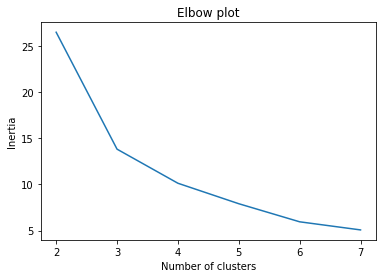

In [12]:
sns.lineplot(x=range(2, 8), y=inertia_list)
plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')

Repeat the clustering, this time with 3 different features.

In [13]:
X2_train = train[['sepal_length', 'petal_length', 'sepal_width']]

In [14]:
kmeans2 = KMeans(n_clusters=3)

kmeans2.fit(X2_train)

kmeans2.predict(X2_train)

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

In [15]:
train['cluster_3f'] = kmeans2.predict(X2_train)

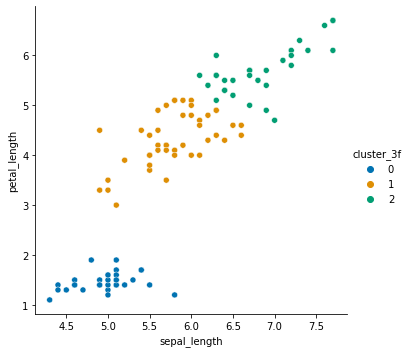

In [16]:
sns.relplot(x='sepal_length', y='petal_length', hue='cluster_3f',
            palette='colorblind', data=train)

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.